<a href="https://colab.research.google.com/github/VygovskayaNatalya/Lesson1_Python/blob/main/%D0%9A%D0%B0%D0%BA_%D1%81%D0%BE%D0%B7%D0%B4%D0%B0%D1%82%D1%8C_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BA%D1%83_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_chatGPT_%D0%92%D0%B5%D0%B1%D0%B8%D0%BD%D0%B0%D1%80_13_%D1%81%D0%B5%D0%BD%D1%82%D1%8F%D0%B1%D1%80%D1%8F_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для создания нейросети с помощью chatGPT необходимо составить очень подробную инструкцию, как организованы данные, в каком они находятся формате, какие папки содержит архив, что в них находится и как мы хотим, чтобы chatGPT их подготовил. Это - одна из самых важных частей инструкции. Надо отметить, что chatGPT не может что-то скачивать или разархивировать, поэтому и инструкции стоит делать в формате "напиши код скачивания" или "напиши код разархивации", вместо "скачай" или "разархивируй".

Рассказываем, как устроены наши данные, и как их нужно подготовить для подачи в сеть.

## Запрос к ChatGPT:

Напиши  код, при помощи которого можно посмотреть изображения в датасете по этой ссылке 'https://storage.yandexcloud.net/aiueducation/marketing/datasets/reality.zip', датасет состоит из 10 папок, название каждой папки соответствует названию категории. Выведи по 1 изображению из каждой категории

## Ответ ChatGPT

Для выполнения этой задачи вам потребуется:

* Скачать датасет.
* Извлечь его.
* Прочитать и показать изображения из каждой директории.

Вот примерный код, который делает это:

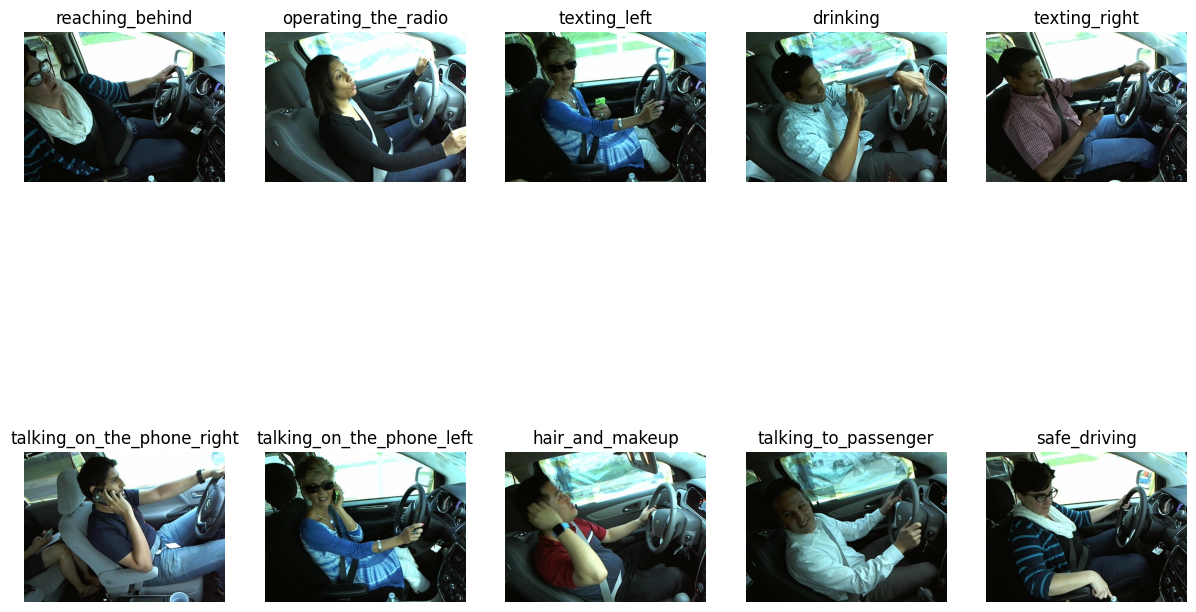

In [ ]:
import requests
import zipfile
import os
import matplotlib.pyplot as plt
import cv2

# 1. Скачиваем датасет
url = 'https://storage.yandexcloud.net/aiueducation/marketing/datasets/reality.zip'
response = requests.get(url, stream=True)
with open('reality.zip', 'wb') as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

# 2. Извлекаем содержимое zip-файла
with zipfile.ZipFile('reality.zip', 'r') as zip_ref:
    zip_ref.extractall('reality_dataset')

# 3. Прочитываем и показываем изображения из каждой директории
dataset_dir = 'reality_dataset'
categories = [folder for folder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, folder))]

plt.figure(figsize=(15, 10))
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_dir, category)
    image_name = os.listdir(category_path)[0]  # берем первое изображение из каждой директории
    image_path = os.path.join(category_path, image_name)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.show()


## Запрос № 1 к ChatGPT:

Напиши подготовку тенировочных данных для нейронной сети по классификации изображений, для этого для напиши код скачивания датасета при помощи gdown по этой ссылке 'https://storage.yandexcloud.net/aiueducation/marketing/datasets/reality.zip', и код разархивации датасета из zip формата в директорию 'content/cars'. Датасет не поделен на train и test. Он состоит из 10 папок, название каждой папки соответствует названию категории, каждый файл необходимо открыть при помощи Image.open, не используй генератор. Добавь в код масштабирование данных и приведи y_train  к формату one hot encoding. Используй LabelEncoder для кодирования строковых меток в целые числа. Определи список названий классов и количество классов. создай простую keras модель на получившихся данных


## Ответ ChatGPT:

In [ ]:
import os
import gdown
import zipfile
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Скачиваем датасет
url = 'https://storage.yandexcloud.net/aiueducation/marketing/datasets/reality.zip'
gdown.download(url, 'reality.zip', quiet=False)

# Распаковываем набор данных
with zipfile.ZipFile("reality.zip","r") as zip_ref:
    zip_ref.extractall("content/cars")

# Загружаем изображения и ярлыки
X = []
y = []
classes = os.listdir("content/cars")
for i, class_name in enumerate(classes):
    for image_name in os.listdir("content/cars/" + class_name):
        image = Image.open("content/cars/" + class_name + "/" + image_name)
        image = image.resize((64, 64))
        X.append(np.array(image))
        y.append(class_name)

# Масштабируем данные
X = np.array(X) / 255.0

# Кодируем ярлыки
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Приводим ярлыки к формату One-hot encoding
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

# Перемешиваем данные
X, y = shuffle(X, y)

# Делим набор данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем простую модель keras
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Downloading...
From: https://storage.yandexcloud.net/aiueducation/marketing/datasets/reality.zip
To: /content/reality.zip
100%|██████████| 127M/127M [00:06<00:00, 18.9MB/s]


In [ ]:
num_classes

Получаем код для запуска обучения, строим график.

## Запрос № 2 к ChatGPT:
Теперь напиши, как дополнить этот код, чтобы запустить обучение модели на 10 эпохах, построй график точности по эпохам

## Ответ ChatGPT:

Epoch 1/10
75/75 [==============================] - 7s 81ms/step - loss: 1.9823 - accuracy: 0.3625 - val_loss: 1.4322 - val_accuracy: 0.5733
Epoch 2/10
75/75 [==============================] - 8s 112ms/step - loss: 0.7887 - accuracy: 0.8008 - val_loss: 0.6055 - val_accuracy: 0.8367
Epoch 3/10
75/75 [==============================] - 6s 79ms/step - loss: 0.3362 - accuracy: 0.9367 - val_loss: 0.2785 - val_accuracy: 0.9517
Epoch 4/10
75/75 [==============================] - 7s 96ms/step - loss: 0.1589 - accuracy: 0.9787 - val_loss: 0.2511 - val_accuracy: 0.9400
Epoch 5/10
75/75 [==============================] - 6s 79ms/step - loss: 0.0954 - accuracy: 0.9875 - val_loss: 0.1951 - val_accuracy: 0.9450
Epoch 6/10
75/75 [==============================] - 7s 97ms/step - loss: 0.0586 - accuracy: 0.9937 - val_loss: 0.1463 - val_accuracy: 0.9650
Epoch 7/10
75/75 [==============================] - 6s 79ms/step - loss: 0.0332 - accuracy: 0.9996 - val_loss: 0.1150 - val_accuracy: 0.9700
Epoch 8/10
7

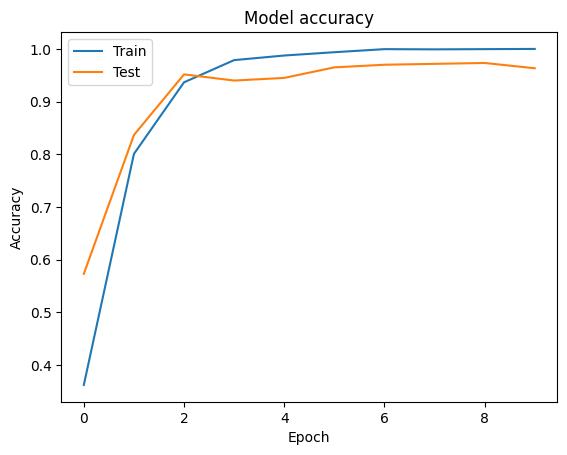

In [ ]:
import matplotlib.pyplot as plt

# Обучаем модель
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Рисуем график точности по эпохам обучения
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

*Текстовый комментарий chatGPT*

Добавив этот код, мы запускаем обучение модели на 10 эпохах. Мы сохраняем результат обучения в переменной history, чтобы построить график точности модели по эпохам. Мы используем plt.plot() для отображения истории обучения из history.history['accuracy'] (точность на обучающем наборе) и history.history['val_accuracy'] (точность на тестовом наборе). И далее добавляем легенду и отображаем график.

Пробуем создать более мощную модель, проверяем различные варианты batch_size

## Запрос № 3 к ChatGPT:

Это слишком простая модель. Создай более мощную модель, код запуска обучения, график точности, проверь в цикле различные batch_size (32, 64, 128)

## Ответ ChatGPT:

Epoch 1/10
75/75 [==============================] - 29s 375ms/step - loss: 2.7342 - accuracy: 0.3450 - val_loss: 2.4609 - val_accuracy: 0.1000
Epoch 2/10
75/75 [==============================] - 25s 338ms/step - loss: 1.1890 - accuracy: 0.6525 - val_loss: 2.8607 - val_accuracy: 0.1200
Epoch 3/10
75/75 [==============================] - 23s 309ms/step - loss: 0.6705 - accuracy: 0.7912 - val_loss: 2.7788 - val_accuracy: 0.1717
Epoch 4/10
75/75 [==============================] - 22s 299ms/step - loss: 0.4199 - accuracy: 0.8696 - val_loss: 3.1021 - val_accuracy: 0.1900
Epoch 5/10
75/75 [==============================] - 23s 311ms/step - loss: 0.3298 - accuracy: 0.8996 - val_loss: 2.4547 - val_accuracy: 0.3833
Epoch 6/10
75/75 [==============================] - 23s 307ms/step - loss: 0.2915 - accuracy: 0.9054 - val_loss: 0.9328 - val_accuracy: 0.6967
Epoch 7/10
75/75 [==============================] - 23s 304ms/step - loss: 0.2047 - accuracy: 0.9383 - val_loss: 0.3937 - val_accuracy: 0.8583

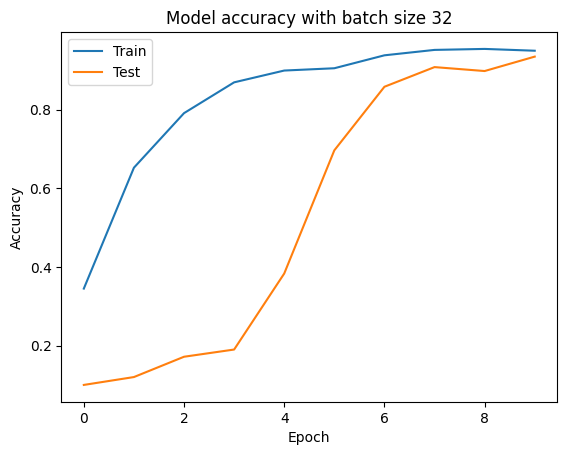

Epoch 1/10
38/38 [==============================] - 25s 637ms/step - loss: 0.0738 - accuracy: 0.9762 - val_loss: 0.1683 - val_accuracy: 0.9483
Epoch 2/10
38/38 [==============================] - 27s 725ms/step - loss: 0.0469 - accuracy: 0.9850 - val_loss: 0.1502 - val_accuracy: 0.9633
Epoch 3/10
38/38 [==============================] - 24s 638ms/step - loss: 0.0269 - accuracy: 0.9925 - val_loss: 0.1213 - val_accuracy: 0.9750
Epoch 4/10
38/38 [==============================] - 25s 657ms/step - loss: 0.0313 - accuracy: 0.9875 - val_loss: 0.1368 - val_accuracy: 0.9667
Epoch 5/10
38/38 [==============================] - 24s 642ms/step - loss: 0.0152 - accuracy: 0.9958 - val_loss: 0.1283 - val_accuracy: 0.9717
Epoch 6/10
38/38 [==============================] - 23s 595ms/step - loss: 0.0164 - accuracy: 0.9929 - val_loss: 0.1193 - val_accuracy: 0.9717
Epoch 7/10
38/38 [==============================] - 24s 621ms/step - loss: 0.0186 - accuracy: 0.9946 - val_loss: 0.1342 - val_accuracy: 0.9700

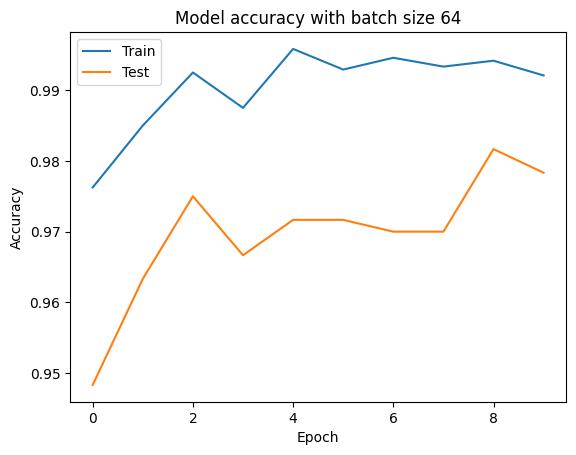

Epoch 1/10
19/19 [==============================] - 25s 1s/step - loss: 0.0163 - accuracy: 0.9933 - val_loss: 0.1247 - val_accuracy: 0.9733
Epoch 2/10
19/19 [==============================] - 26s 1s/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.1302 - val_accuracy: 0.9783
Epoch 3/10
19/19 [==============================] - 24s 1s/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.1216 - val_accuracy: 0.9767
Epoch 4/10
19/19 [==============================] - 25s 1s/step - loss: 0.0108 - accuracy: 0.9958 - val_loss: 0.1194 - val_accuracy: 0.9783
Epoch 5/10
19/19 [==============================] - 26s 1s/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.1239 - val_accuracy: 0.9783
Epoch 6/10
19/19 [==============================] - 24s 1s/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.1242 - val_accuracy: 0.9767
Epoch 7/10
19/19 [==============================] - 24s 1s/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.1203 - val_accuracy: 0.9800
Epoch 8/10
19/19 [==

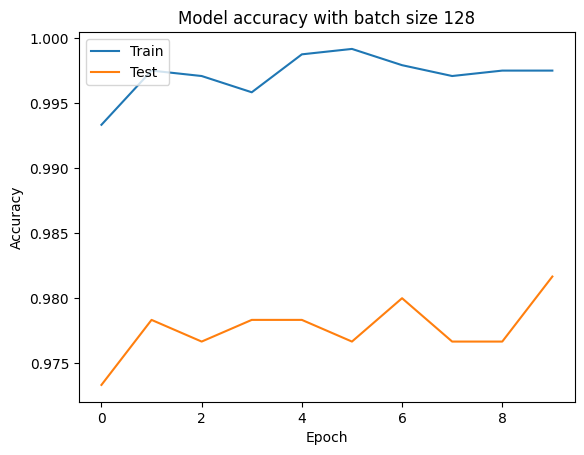

In [ ]:
from keras.layers import Dropout, BatchNormalization

# Создаем более мощную модель
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_sizes = [32, 64, 128]
for batch_size in batch_sizes:
    # Обучаем модель
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_test, y_test))

    # Рисуем график точности по эпохам обучения
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy with batch size {batch_size}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


Получилось не совсем то, что мы хотели - код, созданный chatGPT не проверяет точность при разных batch_size, а дообучает модель на их разных размерах. Необходимо было более точно составить запрос.

## Запрос № 4 к ChatGPT:

Сделай код запуска этой модели в цикле с разными размерами batch_size (32, 64, 128), выведи график точности по каждому запуску

## Ответ ChatGPT:

Epoch 1/10
75/75 [==============================] - 28s 346ms/step - loss: 2.5164 - accuracy: 0.3875 - val_loss: 2.4281 - val_accuracy: 0.0950
Epoch 2/10
75/75 [==============================] - 22s 296ms/step - loss: 1.0267 - accuracy: 0.7142 - val_loss: 2.9355 - val_accuracy: 0.0967
Epoch 3/10
75/75 [==============================] - 23s 309ms/step - loss: 0.6543 - accuracy: 0.8021 - val_loss: 2.9774 - val_accuracy: 0.1000
Epoch 4/10
75/75 [==============================] - 23s 314ms/step - loss: 0.4645 - accuracy: 0.8512 - val_loss: 2.0835 - val_accuracy: 0.3133
Epoch 5/10
75/75 [==============================] - 25s 330ms/step - loss: 0.3158 - accuracy: 0.9013 - val_loss: 1.6712 - val_accuracy: 0.5450
Epoch 6/10
75/75 [==============================] - 23s 307ms/step - loss: 0.2169 - accuracy: 0.9250 - val_loss: 0.5177 - val_accuracy: 0.8367
Epoch 7/10
75/75 [==============================] - 22s 286ms/step - loss: 0.1653 - accuracy: 0.9517 - val_loss: 0.3885 - val_accuracy: 0.8917

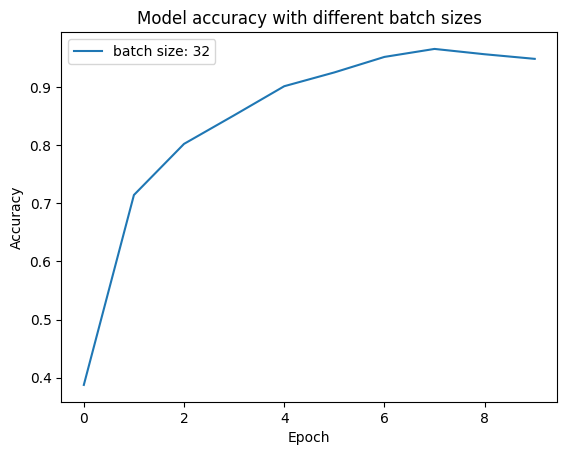

Epoch 1/10
38/38 [==============================] - 25s 624ms/step - loss: 3.3228 - accuracy: 0.2746 - val_loss: 2.2227 - val_accuracy: 0.1733
Epoch 2/10
38/38 [==============================] - 23s 613ms/step - loss: 1.3869 - accuracy: 0.5771 - val_loss: 2.5087 - val_accuracy: 0.1233
Epoch 3/10
38/38 [==============================] - 22s 567ms/step - loss: 0.9048 - accuracy: 0.7183 - val_loss: 2.8392 - val_accuracy: 0.1317
Epoch 4/10
38/38 [==============================] - 22s 581ms/step - loss: 0.6401 - accuracy: 0.7962 - val_loss: 3.0888 - val_accuracy: 0.1350
Epoch 5/10
38/38 [==============================] - 22s 586ms/step - loss: 0.4131 - accuracy: 0.8650 - val_loss: 3.0864 - val_accuracy: 0.1100
Epoch 6/10
38/38 [==============================] - 22s 570ms/step - loss: 0.2578 - accuracy: 0.9137 - val_loss: 3.0544 - val_accuracy: 0.1317
Epoch 7/10
38/38 [==============================] - 22s 587ms/step - loss: 0.2183 - accuracy: 0.9254 - val_loss: 2.6131 - val_accuracy: 0.2133

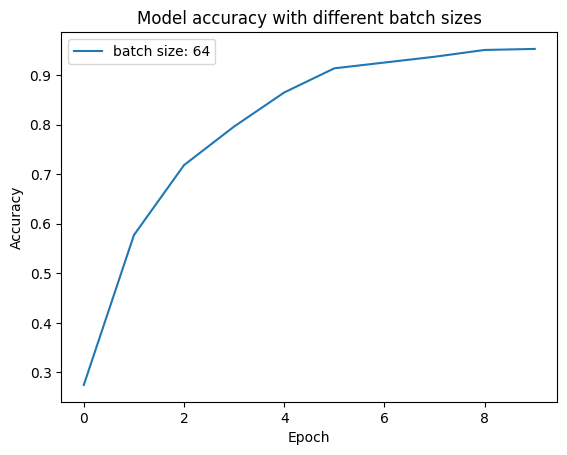

Epoch 1/10
19/19 [==============================] - 25s 1s/step - loss: 3.2206 - accuracy: 0.2729 - val_loss: 2.2320 - val_accuracy: 0.0983
Epoch 2/10
19/19 [==============================] - 23s 1s/step - loss: 1.5516 - accuracy: 0.5371 - val_loss: 2.3185 - val_accuracy: 0.0950
Epoch 3/10
19/19 [==============================] - 23s 1s/step - loss: 0.9082 - accuracy: 0.7092 - val_loss: 2.5851 - val_accuracy: 0.0950
Epoch 4/10
19/19 [==============================] - 23s 1s/step - loss: 0.6098 - accuracy: 0.7950 - val_loss: 2.7821 - val_accuracy: 0.0950
Epoch 5/10
19/19 [==============================] - 24s 1s/step - loss: 0.4177 - accuracy: 0.8617 - val_loss: 2.9702 - val_accuracy: 0.0950
Epoch 6/10
19/19 [==============================] - 23s 1s/step - loss: 0.3082 - accuracy: 0.8963 - val_loss: 2.9405 - val_accuracy: 0.0950
Epoch 7/10
19/19 [==============================] - 23s 1s/step - loss: 0.2103 - accuracy: 0.9300 - val_loss: 3.1833 - val_accuracy: 0.0950
Epoch 8/10
19/19 [==

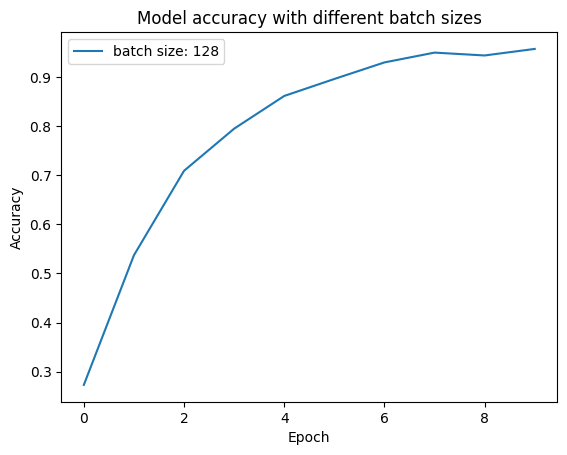

In [ ]:
batch_size_list = [32, 64, 128]

for batch_size in batch_size_list:
    # Создаем более мощную модель
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Обучаем модель
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_test, y_test))

    # Рисуем график точности по эпохам обучения
    plt.plot(history.history['accuracy'], label=f'batch size: {batch_size}')
    plt.title('Model accuracy with different batch sizes')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

Таким образом, мы получили (хоть и не с первого раза) то, что мы хотели (почти). Стоило добавить, что графики нужно было отрисовывать по точности на проверочной выборке.

## Запрос № 5 к ChatGPT:

Как увеличить аккураси нашей модели?

## Ответ ChatGPT:

Есть различные способы увеличить точность модели:

1. Использование более мощной модели: использование большего количества сверточных слоев, нейронов и слоев связи.

2. Использование более большого датасета: использование большего количества данных для обучения модели может увеличить точность.

3. Дополнительная аугментация данных: использование аугментации данных, такой как повороты, масштабирование и другие, может помочь модели обобщаться на новые данные.

4. Использование сверточных сетей предварительно обученных (Transfer Learning): использование предварительно обученных сверточных сетей может существенно увеличить точность модели.

5. Использование другой оптимизации и другой функции потерь для обучения модели: использование более эффективных алгоритмов оптимизации, таких как Adam, RMSprop или Adagrad и использование более подходящей функции потерь для задачи классификации, такой как categorical_crossentropy или sparse_categorical_crossentropy может помочь улучшить точность модели.

6. Использование регуляризации: использование регуляризации, такой как L1 и L2, может помочь предотвратить переобучение модели.

7. Использование стандартизации данных: использование стандартизации данных может помочь сделать данные более однородными и улучшить точность модели.

## Запрос № 6

Сделай в цикле проверку точности последней модели с разными оптимизаторами и выведи график сравнения полученных точностей



## Ответ ChatGPT:

Epoch 1/10
75/75 [==============================] - 23s 304ms/step - loss: 2.8259 - accuracy: 0.3358 - val_loss: 2.4004 - val_accuracy: 0.1133
Epoch 2/10
75/75 [==============================] - 23s 305ms/step - loss: 1.2947 - accuracy: 0.6246 - val_loss: 3.2331 - val_accuracy: 0.1733
Epoch 3/10
75/75 [==============================] - 23s 302ms/step - loss: 0.7339 - accuracy: 0.7758 - val_loss: 3.2309 - val_accuracy: 0.1517
Epoch 4/10
75/75 [==============================] - 23s 306ms/step - loss: 0.5542 - accuracy: 0.8296 - val_loss: 4.1638 - val_accuracy: 0.1183
Epoch 5/10
75/75 [==============================] - 23s 306ms/step - loss: 0.3883 - accuracy: 0.8746 - val_loss: 1.9678 - val_accuracy: 0.4583
Epoch 6/10
75/75 [==============================] - 22s 298ms/step - loss: 0.2941 - accuracy: 0.9067 - val_loss: 2.3459 - val_accuracy: 0.3700
Epoch 7/10
75/75 [==============================] - 23s 308ms/step - loss: 0.2303 - accuracy: 0.9287 - val_loss: 0.5580 - val_accuracy: 0.7817

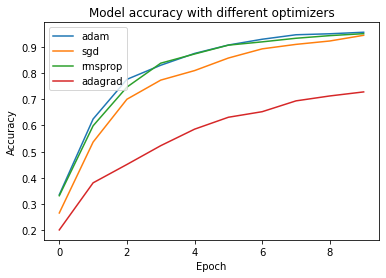

In [ ]:
from keras import optimizers

optimizer_list = ['adam', 'sgd', 'rmsprop', 'adagrad']

for optimizer in optimizer_list:
    # Создаем более мощную модель
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Обучаем модель
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Рисуем график точности по эпохам обучения
    plt.plot(history.history['accuracy'], label=optimizer)
    plt.title('Model accuracy with different optimizers')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
plt.show()


*Комментарий ChatGPT:*

*В этом коде используется цикл for, чтобы протестировать точность модели с различными оптимизаторами и отобразить график сравнения полученных точностей. В каждой итерации цикла инициализируется модель с различным оптимизатором, затем обучается и отображается график точности по эпохам для каждого оптимизатора. В конце цикла график отображается с использованием plt.show(), чтобы можно было сравнить точности моделей с различными оптимизаторами.*

Попробуем изменить некоторые параметры модели, дав точные указания.

## Запрос № 6 к ChatGPT:

Напиши код запуска предыдущей модели, заменив Flatten на GlobalMaxPooling2D, оптимизатор Adam, batch_size = 32, добавь слой Dropout после каждого BatchNormalization. Выведи график обучения на проверочной выборке (в этот раз не допустим недосказанности и уточним, по какой выборке следует отрисовывать графики)

## Ответ ChatGPT:

In [ ]:
# Создаем более мощную модель
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D((2, 2)))
model.add(GlobalMaxPooling2D())
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Рисуем график точности по эпохам обучения
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with GlobalMaxPooling2D')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


NameError: ignored

Обучение не запустилось, не импортирован используемый в архитектуре модели слой. Попросим ChatGPT исправить ошибку:

## Запрос № 7 к ChatGPT:

При выполнении кода получаем ошибку NameError: name 'GlobalMaxPooling2D' is not defined. Исправь

## Ответ ChatGPT:

*Эта ошибка возникает из-за того, что класс GlobalMaxPooling2D не импортирован из модуля keras. Чтобы исправить это, необходимо добавить следующую строку кода в начало файла:*

from keras.layers import GlobalMaxPooling2D

Epoch 1/10
75/75 [==============================] - 30s 383ms/step - loss: 2.7373 - accuracy: 0.2467 - val_loss: 2.8840 - val_accuracy: 0.1017
Epoch 2/10
75/75 [==============================] - 29s 393ms/step - loss: 1.4216 - accuracy: 0.5029 - val_loss: 3.2346 - val_accuracy: 0.1183
Epoch 3/10
75/75 [==============================] - 29s 391ms/step - loss: 0.9979 - accuracy: 0.6546 - val_loss: 3.2536 - val_accuracy: 0.1517
Epoch 4/10
75/75 [==============================] - 36s 479ms/step - loss: 0.7190 - accuracy: 0.7638 - val_loss: 3.0229 - val_accuracy: 0.2033
Epoch 5/10
75/75 [==============================] - 36s 482ms/step - loss: 0.5577 - accuracy: 0.8112 - val_loss: 2.6622 - val_accuracy: 0.3033
Epoch 6/10
75/75 [==============================] - 34s 447ms/step - loss: 0.4241 - accuracy: 0.8567 - val_loss: 2.0211 - val_accuracy: 0.3917
Epoch 7/10
75/75 [==============================] - 35s 467ms/step - loss: 0.3459 - accuracy: 0.8858 - val_loss: 1.5097 - val_accuracy: 0.5033

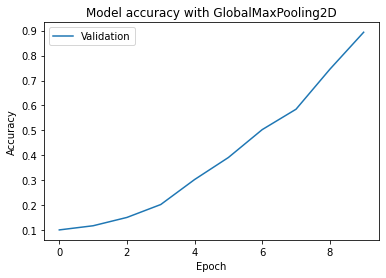

In [ ]:
from keras.layers import GlobalMaxPooling2D
# Создаем более мощную модель
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(GlobalMaxPooling2D())
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Рисуем график точности по эпохам обучения
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with GlobalMaxPooling2D')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


Все наши "пожелания" учтены, модель обучается на нужных нам параметрах, хотя, следует отметить, что архитектура модели, предложенная ChatGPT в самом начале, явно показывает лучную точность на проверочной выборке, чем результаты наших экспериментов, хотя попробовать стоило.

## Выводы:
1. Благодара ChatGPT можно вообще обойтись без написания кода. Однако необходимо давать подробные инструкции, как "устроены" наши данные, в каком они формате, что содержат, и как их следует подготавливать.

2. Порой ChatGPT все же допускает неточности - может забыть импортировать библиотеку или слой, это легко исправляется - достаточно написать в ChatGPT содержание ошибки и попросить исправить - будет предложено 1 или несколько вариантов, как решить проблему.

3. Необходимо внимательно просматривать код, предложенный ChatGPT, на предмет того, получили ли мы желаемый результат.  Код может срабатывать, но из-за неточных инструкций выдавать не то, что от него ожидается.

4. Чат достаточно часто вылетает, но это не проблема - достаточно перезагрузить страницу либо еще раз зайти в нужный чат - не обязательно начинать "с нуля".

5.  Важно всегда в сообщениях любым образом показывать, что нужно именно продолжить уже начатый код, иначе chatGPT  может потерять нить и не учесть, что было уже сделано.

6. Можно запросить подробные комментарии к коду - и ChatGPT разъяснит каждую строчку или операцию - очень удобно для начинающих программистов.

7. Имеет смысл избегать команд "скачай" или "загрузи", заменив их на "напиши код для скачивания архива", например, в противном случае, chatGPT  может ответить, что не умеет ничего скачивать и напишет базовые рекомендации.

# Мои запросы

## Запрос 1
Сделай пример динамически обновляющейся визуализации функции y=sin(x) в python

Один из способов визуализировать динамическую визуализацию функции y=sin(x) в Python - это использовать библиотеку matplotlib.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 100)
line, = ax.plot(x, np.sin(x))

def update(frame):
    line.set_ydata(np.sin(x + frame/10.0))
    return line,

ani = animation.FuncAnimation(fig, update, frames=100, interval=50)
plt.show()

В этом примере создается фигура fig и ось ax с помощью plt.subplots(). Затем мы создаем массив x с диапазоном значений от 0 до 2π, и используем его для создания линии line с помощью ax.plot(x, np.sin(x)).

В функции update мы обновляем данные для line.set_ydata(np.sin(x + frame/10.0)), где frame является идентификатором кадра. Затем мы создаем объект анимации с помощью animation.FuncAnimation и передаем ему fig, update, количество кадров frames=100 и интервал времени между кадрами interval=50. Наконец, мы отображаем анимацию с помощью `plt